# THE SPARKS FOUNDATION #GRIPMAR2021
### NAME: Sanjana Aniwar
### TASK4: Exploratory Data Analysis - Terrorism

### Objectives :
#### 1. Perform EDA on the given dataset
#### 2. Try to find out the hot zone of terrorism.
#### 3. Derive all the security issues and insights.

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [4]:
# to ignore the warnings
import warnings
warnings.filterwarnings(action="ignore")

In [6]:
df=pd.read_csv("globalterrorismdb_0718dist.csv", low_memory=False, encoding='latin-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Data Cleaning

In [7]:
# renaming the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':
                  'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                  'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                   'targtype1_txt':'TargetType','weaptype1_txt':'Weapon_type','motive':'Motive',
                  'extended':'Extended'},inplace=True)

In [8]:
df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'Extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
df.shape

(181691, 135)

In [10]:
missing_values_count = df.isnull().sum()
print (missing_values_count)

eventid            0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


In [11]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

56.481718962414206


In [12]:
# remove all the rows that contain a missing value
df.dropna()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


In [14]:
# remove all columns with at least one missing value
columns_with_na_dropped = df.dropna(axis=1)
columns_with_na_dropped.head()

,eventid,Year,Month,Day,Extended,country,Country,region,Region,vicinity,...,Group,individual,weaptype1,Weapon_type,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,0,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,0,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,0,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


In [16]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % df.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 135 

Columns with na's dropped: 29


In [17]:
df=df[['Year','Month','Day','Country','State','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','TargetType','Weapon_type','Motive']]
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)

In [18]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed              0
Wounded             0
Target            636
Summary         66129
Group               0
TargetType          0
Weapon_type         0
Motive         131130
dtype: int64

## Data Insights

In [19]:
print('Country with the most attacks:',df['Country'].value_counts().idxmax())
print('City with the most attacks:',df['city'].value_counts().index[1])

Country with the most attacks: Iraq
City with the most attacks: Baghdad


In [20]:
print('Region with the most attacks:',df['Region'].value_counts().idxmax())

Region with the most attacks: Middle East & North Africa


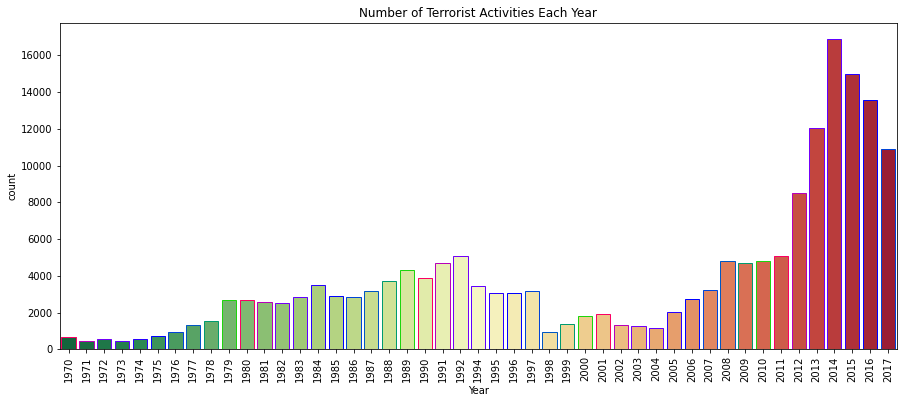

In [21]:
# Terrorist Activities each year
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('prism',10))
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities Each Year')
plt.show()

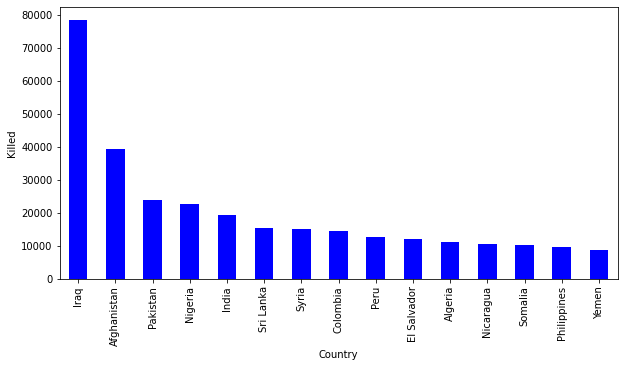

In [22]:
plt.figure(figsize = (10,5))
df.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(15).plot(kind = 'bar', color = 'blue')

plt.xticks(rotation=90)
plt.ylabel("Killed")
plt.show()

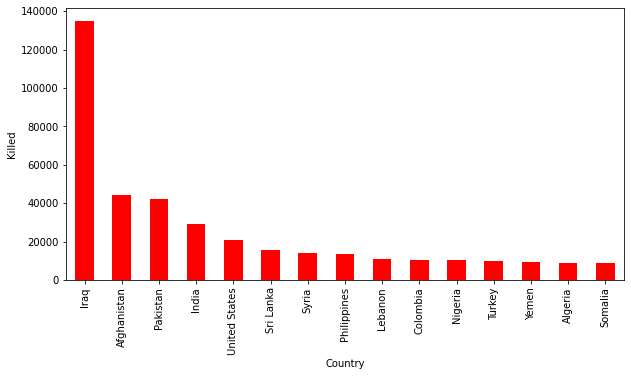

In [23]:
plt.figure(figsize = (10,5))
df.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(15).plot(kind = 'bar', color = 'red')

plt.xticks(rotation=90)
plt.ylabel("Killed")
plt.show()

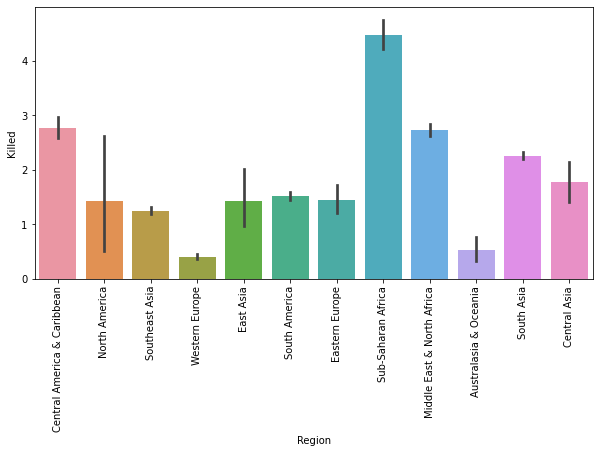

In [24]:
plt.figure(figsize = (10,5))
sns.barplot(x='Region',y='Killed',data=df)
plt.xticks(rotation=90)
plt.ylabel("Killed")
plt.show()

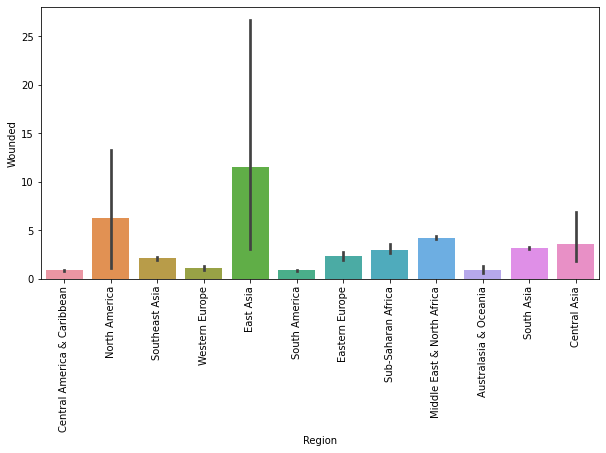

In [25]:
plt.figure(figsize = (10,5))
sns.barplot(x='Region',y='Wounded',data=df)
plt.xticks(rotation=90)
plt.ylabel("Wounded")
plt.show()

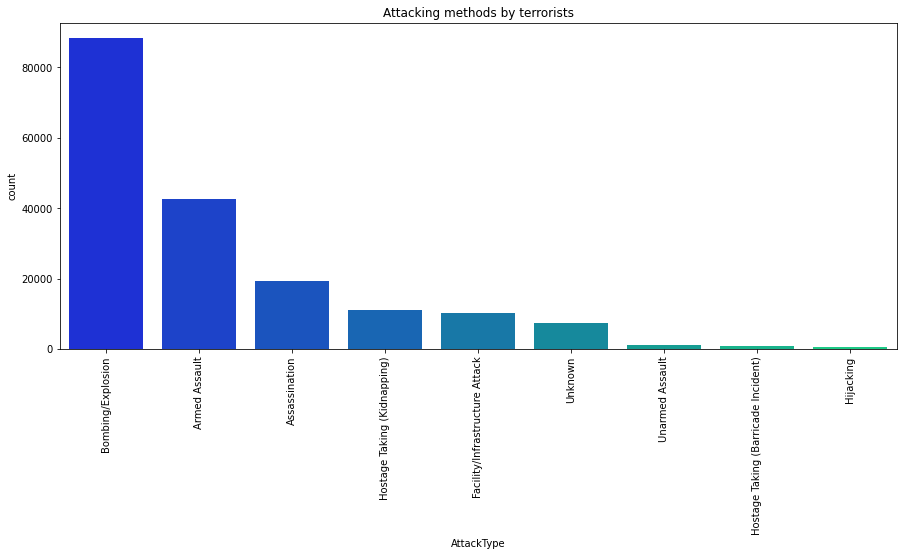

In [26]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=df,palette='winter',order=df['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Attacking methods by terrorists")
plt.show()

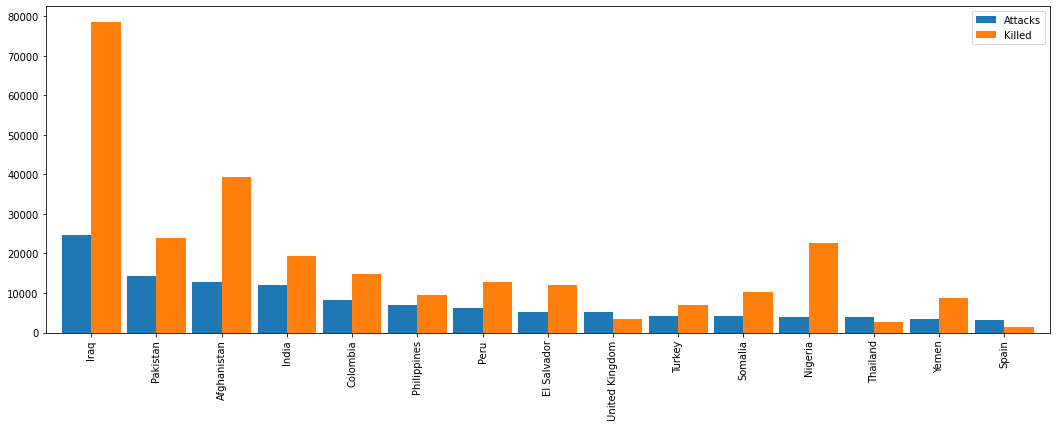

In [27]:
coun_terror=df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

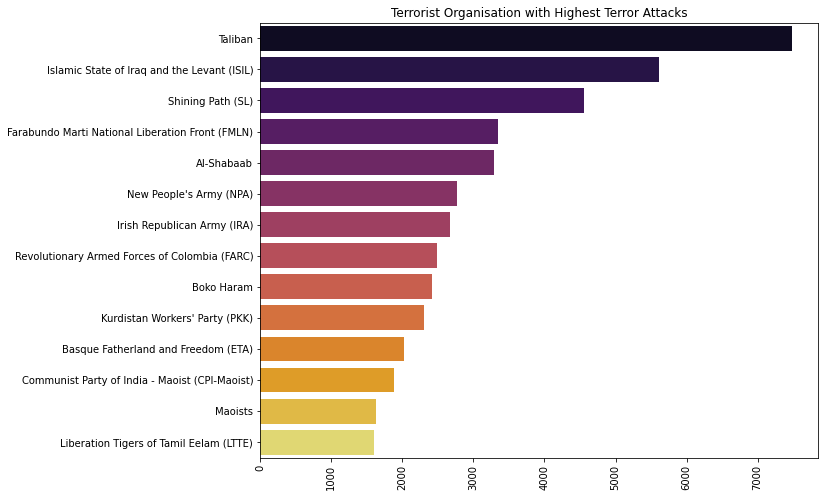

In [28]:
sns.barplot(df['Group'].value_counts()[1:15].values,df['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Organisation with Highest Terror Attacks')
plt.show()

In [29]:
df.tail(10)

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,TargetType,Weapon_type,Motive
181681,2017,12,31,Philippines,Maguindanao,Southeast Asia,Shariff Aguak,6.862806,124.443649,Bombing/Explosion,1,5,Patrol,12/31/2017: A roadside bomb detonated targetin...,Bangsamoro Islamic Freedom Movement (BIFM),Police,Explosives,NaN
181682,2017,12,31,Italy,Marche,Western Europe,Spinetoli,42.888982,13.772795,Facility/Infrastructure Attack,0,0,Migrant Center,12/31/2017: Assailants set fire to a migrants'...,Unknown,Private Citizens & Property,Incendiary,"The specific motive is unknown; however, sourc..."
181683,2017,12,31,Afghanistan,Faryab,South Asia,Kohistan district,35.315467,64.815508,Armed Assault,6,0,House of Member,12/31/2017: Assailants attacked the house of a...,Taliban,Terrorists/Non-State Militia,Firearms,"The specific motive is unknown; however, sourc..."
181684,2017,12,31,India,Assam,South Asia,Hungrum,25.180162,93.015788,Hostage Taking (Kidnapping),0,0,Personal Security Officer of Council Member Ih...,12/31/2017: Assailants abducted Prafulla Phuka...,Zeliangrong United Front,Government (General),Firearms,NaN
181685,2017,12,31,Afghanistan,Faryab,South Asia,Maymana,35.921051,64.774544,Bombing/Explosion,0,4,Jewelry Shop,12/31/2017: An explosive device detonated at a...,Unknown,Business,Explosives,NaN
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1,2,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2,7,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0,0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0,0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN
181690,2017,12,31,Philippines,Maguindanao,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0,0,Unknown,12/31/2017: An explosive device was discovered...,Unknown,Unknown,Explosives,NaN


## CONCLUSIONS :
#### So after different type of analyzation ,Overall terrorism is suddenly increased from 2010 and I have ranked the Hot zone in terms of terrorist activities in all regions -

#### #Middle East & North Africa
#### Iraq

#### Overall having highest Number of terrorist rate and sudden increase in terrorist activity after year 2010

#### Libya

#### Overall having low terrorism activity, Second Highest in terms of successful terrorist activities which takes place in this country and an increased in terrorism rate after 2010.

#### Yemen

#### Overall having low terrorism activity, Third Highest in terms of successful terrorist activities which takes place in this country and an increased in terrorism rate after 2010.

### #South Asia
#### Pakistan

#### Overall having 1st highest terrorist rates but if we consider extended terrorist rate so this country is 2nd highest and a very high increase in terrorism rate after 2010.

#### Afghanistan

#### Overall having 2nd Highest terrorist rates and 1st highest in terms of extended terrorist rates and a very high increase in terrorism rate after 2010.

#### India

#### Overall having 3rd highest terrorist rates but there is a good decrease in terrorist rates if we consider the 20s century and an increase in terrorism rate after 2010 but not as that of increase like Afghanistan and Pakistan.

### #Sub-Saharan Africa
#### Nigeria

#### Overall having low terrorism activity but 1st Highest in terms of extended terrorist activities which takes place in this country and 2nd in terms of increased of terrorism rate after 2010.

#### Somalia

#### Overall having low terrorism activity but 2nd Highest in terms of extended terrorist activities which takes place in this country and 1st in terms of increased of terrorism rate after 2010.

#### Sudan

#### Overall having low terrorism activity but 3rd Highest in terms of extended terrorist activities which takes place in this country and a bit increase in terrorism rate after 2010.

### #Solution
#### #More security surveillance required at Iraq.
#### #Noticing the trends of terrorism activities , hugely populated regions suffer major kill ratios. This must be controlled with strict border rules

#### #Impose strict rules in controlling the explosions produce worldwide limiting the number of supplies #High alert at densly populated locations in each city as it is noticed that terrorists target is private citizens and property